<a href="https://colab.research.google.com/github/MatSci495/Lectures/blob/main/UNCERTAINTY_EXPLORATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parameter Estimation with Uncertainty: An Empirical Exploration

This notebook explores the impact of uncertainty in simulated data on the estimation of parameters in various functional forms relevant to materials science. We will empirically investigate how different noise models and levels of uncertainty affect the accuracy and precision of estimated parameters, building upon concepts of weighted least squares and error propagation discussed in the course.

$$ $$
We will consider the following cases:

1.  **Case 1: Multiplicative Noise**
    
    $y = \beta_0 * x^4 * \epsilon_0$, where $\epsilon_0$ represents multiplicative measurement noise.

2.  **Case 2: Multiplicative and Additive Noise**

    $y = \beta_0 * x^2 * \epsilon_0 + \epsilon_1$, where $\epsilon_1$ represents additive instrument noise.

3.  **Case 3: Exponential Decay with Noise**

    $y = \beta_0 * \exp(-\beta_1 * x) * \epsilon_0 + \epsilon_1$, which is relevant for phenomena like exponential decay, where $x$ might represent inverse temperature.

4.  **Case 4: Power Law with Noise**

    $y = \beta_0 * (x^{\beta_1}) * \epsilon_0 + \epsilon_1$
    
    This case explores a power law relationship with an unknown power including  both multiplicative and additive noise.



We will empirically investigate how different noise models and levels of uncertainty affect the accuracy and precision of estimated parameters, building upon concepts of weighted least squares and error propagation discussed in the course.

$$ $$
We will consider the following cases:

1.  **Case 1: Multiplicative Noise**:  $y = \beta_0 * x^4 * \epsilon_0$


    This case can be linearized by taking the natural logarithm: $\ln(y) = \ln(\beta_0) + 4\ln(x) + \ln(\epsilon_0)$. This allows for solving using weighted least squares (specifically, OLS on the linearized data if the variance of $\ln(\epsilon_0)$ is constant). The variance of the estimated parameter $\beta_0$ can be quantified using analytical error propagation from the variance of the estimated intercept in the linearized fit, or empirically through simulations with noisy data.
2.  **Case 2: Multiplicative and Additive Noise**:
    $y = \beta_0 * x^2 * \epsilon_0 + \epsilon_1$

    Here, $\epsilon_1$ represents additive instrument noise. This case requires non-linear least squares. The variance of the estimated parameter $\beta_0$ can be quantified using weighted non-linear least squares, where weights are inversely proportional to the estimated variance of the data points, which depends on both multiplicative and additive noise levels. The covariance matrix from the weighted fit provides estimates of the parameter variances.
3.  **Case 3: Exponential Decay with Noise**:
    $y = \beta_0 * \exp(-\beta_1 * x) * \epsilon_0 + \epsilon_1$

    This case is relevant for phenomena like exponential decay, where $x$ might represent inverse temperature. Similar to Case 2, this requires weighted non-linear least squares due to the combined multiplicative and additive noise leading to non-constant variance. The covariance matrix from the weighted fit provides estimates of the parameter variances for $\beta_0$ and $\beta_1$.
4.  **Case 4: Power Law with Noise**:
    $y = \beta_0 * (x^{\beta_1}) * \epsilon_0 + \epsilon_1$
    
    This case explores a power law relationship with both multiplicative and additive noise. Similar to Cases 2 and 3, this requires weighted non-linear least squares due to the non-constant variance. The variance of the estimated parameters $\beta_0$ and $\beta_1$ can be quantified from the covariance matrix obtained from the weighted fit.

Through these cases, we will gain empirical insight into the challenges of parameter estimation in the presence of uncertainty and underscore the importance of understanding the noise characteristics of experimental data and applying appropriate statistical methods, such as weighted least squares, to obtain reliable results and uncertainty estimates.

# CASE 1

## Case 1: Multiplicative Noise - Weighted Least Squares

In this case, we consider the relationship $y = \beta_0 * x^4 * \epsilon_0$, where $\epsilon_0$ is a multiplicative noise term. By taking the natural logarithm of both sides, we can linearize this equation:

$\ln(y) = \ln(\beta_0) + 4\ln(x) + \ln(\epsilon_0)$

Let $Y = \ln(y)$, $B_0 = \ln(\beta_0)$, $X = \ln(x)$, and $E_0 = \ln(\epsilon_0)$. The equation becomes:

$Y = B_0 + 4X + E_0$

This is in the form of a linear equation $Y = mX + c$, where the slope is fixed at 4 and the intercept is $B_0$. We can use weighted least squares to estimate $B_0$, and thus $\beta_0 = \exp(B_0)$.

The weights in weighted least squares are inversely proportional to the variance of the dependent variable. If the relative uncertainty in $y$ is constant (i.e., the standard deviation of $\epsilon_0$ is constant), then the variance of $\ln(y)$ is approximately constant, and we can use ordinary least squares on the linearized equation. However, if the absolute uncertainty in $y$ is proportional to $y$, then the variance of $\ln(y)$ is approximately constant, and we can use ordinary least squares on the linearized equation. Let's assume the latter for now and revisit the weights if needed.

### Analytical Error Propagation

The linearized equation is $Y = B_0 + 4X + E_0$.

In this form, if we assume the uncertainty is primarily in $Y$ and the variance of $E_0$ (which represents the uncertainty in $\ln(y)$) is constant, we can use ordinary least squares on the linearized data. The variance of the estimated intercept $B_0$ from OLS is given by:

$$\text{Var}(B_0) = \sigma_Y^2 \left( \frac{1}{N} + \frac{\bar{X}^2}{\sum (X_i - \bar{X})^2} \right)$$

where $\sigma_Y^2$ is the variance of $Y$, $N$ is the number of data points, and $\bar{X}$ is the mean of $X$.

To relate this back to the variance of $\beta_0$, we use error propagation on the relationship $\beta_0 = \exp(B_0)$. The standard deviation of $\beta_0$ can be approximated as:

$$\sigma_{\beta_0} \approx \left| \frac{d\beta_0}{dB_0} \right| \sigma_{B_0} = |\exp(B_0)| \sigma_{B_0} = \beta_0 \sigma_{B_0}$$

So, the relative standard deviation of $\beta_0$ is approximately equal to the absolute standard deviation of $B_0$:

$$\frac{\sigma_{\beta_0}}{\beta_0} \approx \sigma_{B_0}$$


We can estimate $\sigma_Y^2$ from the residuals of the linear fit to the log-log data.

True beta_0: 2.5
Estimated beta_0: 2.3802
Estimated standard deviation of beta_0: 0.1127
Noise level (std dev of log(epsilon_0)): 0.3


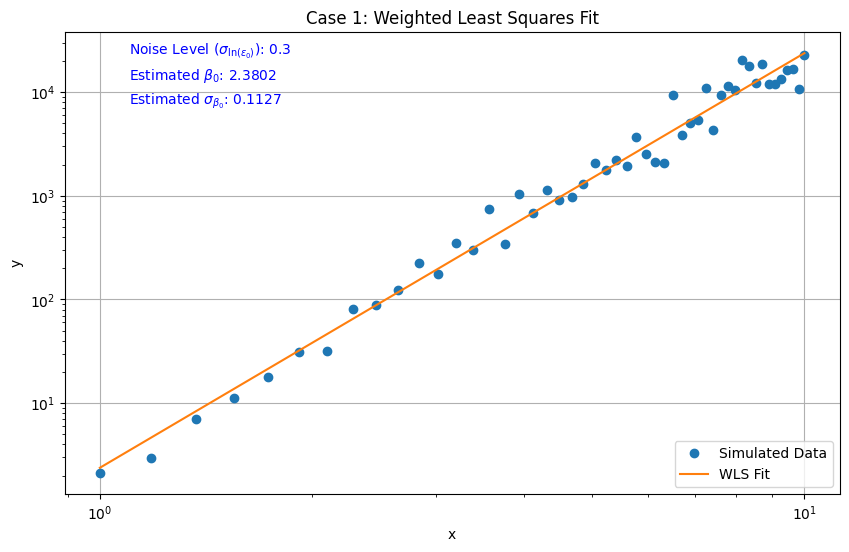

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Simulate Data for Case 1 ---
# Define true parameter value for beta_0
beta_0_true = 2.5
# Generate x data
x_data = np.linspace(1, 10, 50)

# Simulate multiplicative noise (epsilon_0)
# epsilon_0 is drawn from a log-normal distribution, which is simulated
# by drawing from a normal distribution and exponentiating.
# noise_level is the standard deviation of the normal distribution for log(epsilon_0).
noise_level = 0.3 # standard deviation of the normal distribution for log(epsilon_0)
epsilon_0 = np.exp(np.random.normal(0, noise_level, len(x_data)))

# Generate y data with multiplicative noise
y_data = beta_0_true * x_data**4 * epsilon_0

# --- Apply Weighted Least Squares (using OLS on linearized data) ---
# Linearize the data by taking the natural logarithm
# The equation y = beta_0 * x^4 * epsilon_0 becomes ln(y) = ln(beta_0) + 4*ln(x) + ln(epsilon_0)
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

# Define the linear function for fitting the log-log data
# We are fitting log(y) = intercept + 4*log(x), where intercept = log(beta_0)
# The slope is fixed at 4 based on the functional form.
def linear_func(x, intercept):
  return intercept + 4 * x

# Perform the linear fit using curve_fit, fixing the slope
# curve_fit estimates the intercept (log_beta_0_estimated)
params, covariance = curve_fit(linear_func, log_x_data, log_y_data)
log_beta_0_estimated = params[0]

# Convert the estimated log(beta_0) back to beta_0
beta_0_estimated = np.exp(log_beta_0_estimated)

# Calculate the standard deviation of the estimated beta_0 from the covariance matrix
# The covariance matrix from curve_fit provides the variance of the fitted parameters.
# For a single parameter fit (the intercept), the covariance matrix is 1x1.
# The standard deviation of log(beta_0) is sqrt(covariance[0][0]).
# Propagate uncertainty from log(beta_0) to beta_0 using error propagation:
# sigma_beta_0 approx= |d(exp(B_0))/dB_0| * sigma_B_0 = exp(B_0) * sigma_B_0 = beta_0 * sigma_B_0
beta_0_estimated_std_dev = np.sqrt(covariance[0][0]) * beta_0_estimated # Propagate uncertainty from log(beta_0) to beta_0


# --- Print Results ---
print(f"True beta_0: {beta_0_true}")
print(f"Estimated beta_0: {beta_0_estimated:.4f}")
print(f"Estimated standard deviation of beta_0: {beta_0_estimated_std_dev:.4f}")
print(f"Noise level (std dev of log(epsilon_0)): {noise_level}")


# --- Plot Data and Fit ---
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label='Simulated Data')
# Plot the fitted curve
plt.plot(x_data, beta_0_estimated * x_data**4, '-', label='WLS Fit')
plt.xlabel('x')
plt.ylabel('y')
# Use log scales for both axes to better visualize the power law relationship
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Case 1: Weighted Least Squares Fit')
plt.grid(True)

# Add text annotations for noise level, estimated beta_0, and its standard deviation
plt.text(1.1, plt.ylim()[1]*0.6, f'Noise Level ($\\sigma_{{\\ln(\\epsilon_0)}}$): {noise_level}', fontsize=10, color='blue')
plt.text(1.1, plt.ylim()[1]*0.35, f'Estimated $\\beta_0$: {beta_0_estimated:.4f}', fontsize=10, color='blue')
plt.text(1.1, plt.ylim()[1]*0.2, f'Estimated $\\sigma_{{\\beta_0}}$: {beta_0_estimated_std_dev:.4f}', fontsize=10, color='blue')


plt.show()

## Emprical Analysis of Uncertainty

### Handling Uncertainty in x for Case 1 - Empirical Approach

We previously analyzed $y = \beta_0 * x^4 * \epsilon_0$ by linearizing it to $\ln(y) = \ln(\beta_0) + 4\ln(x) + \ln(\epsilon_0)$ and performing weighted least squares (initially as OLS on the linearized data, assuming constant variance in $\ln(y)$).

Now, let's consider the scenario where there is also uncertainty in the independent variable, $x$. If this uncertainty is absolute and normally distributed with a standard deviation $\sigma_x$, it will contribute to the overall uncertainty in our measurements of $y$.

While analytical error propagation can be used to estimate the combined uncertainty in $\ln(y)$ due to uncertainties in both $x$ and $y$, an empirical approach can provide a clear demonstration of its effect on the parameter estimates.

We can simulate the effect of uncertainty in $x$ by adding random noise to our original $x_{data}$ and performing the weighted least squares fit on many such noisy datasets. The spread in the estimated $\beta_0$ values from these many fits will give us an empirical understanding of how uncertainty in $x$ affects the precision of our parameter estimate.

Let's simulate this by adding Gaussian noise to the original `x_data` for Case 1 and repeating the weighted least squares fitting process many times.

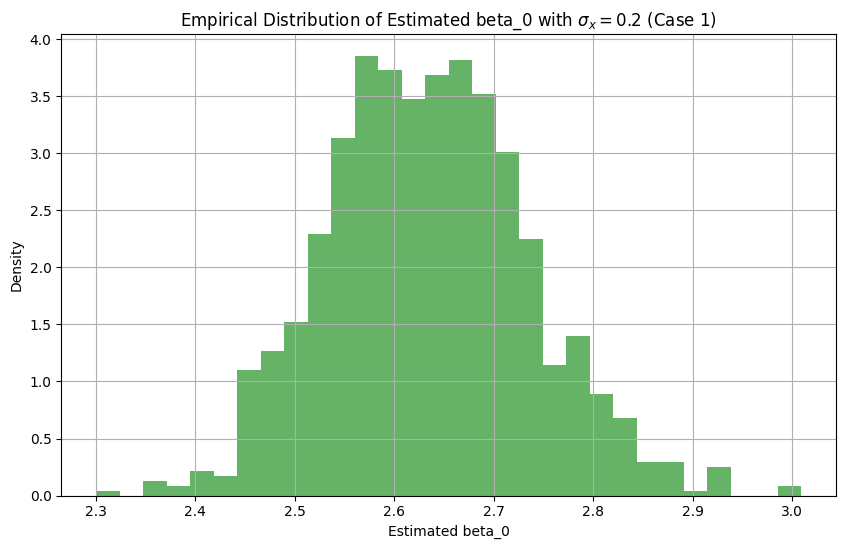

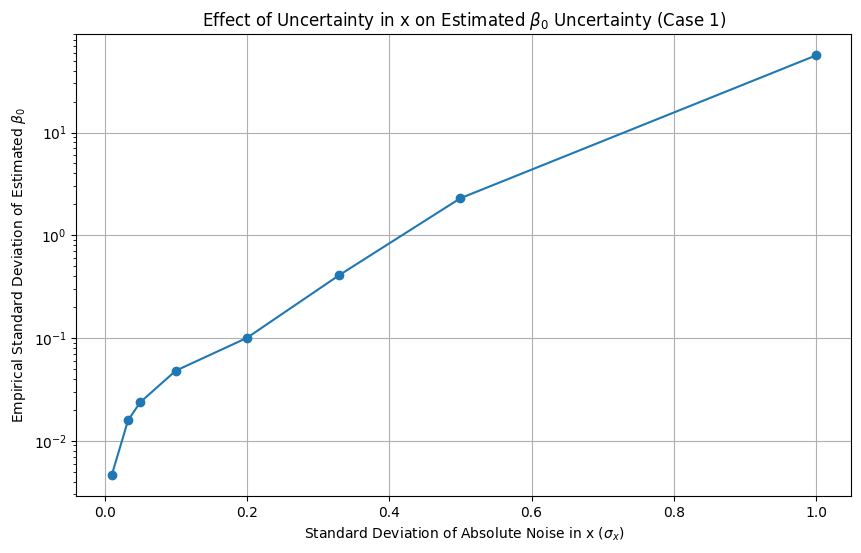

Exploration of different sigma_x values complete.


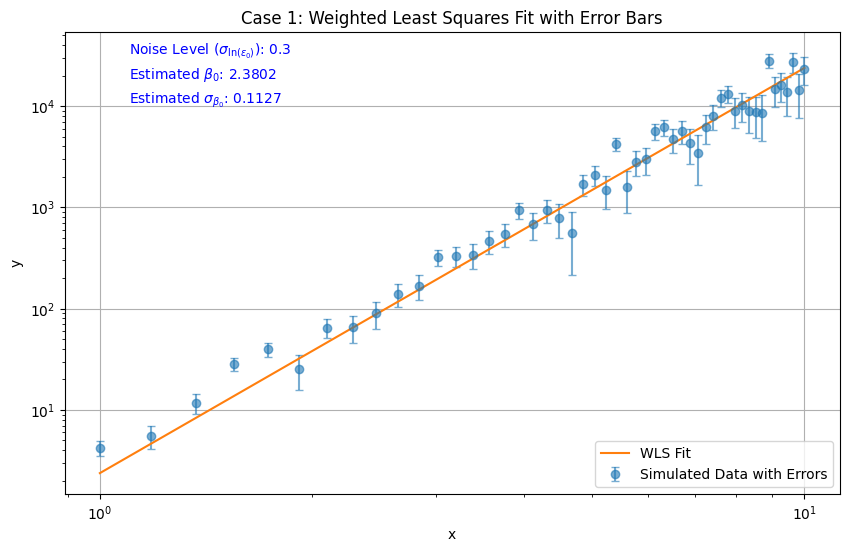

In [17]:
# Empirical investigation of uncertainty in x for Case 1

# Simulate data for Case 1 (including this here to ensure data is available)
np.random.seed(0) # for reproducibility
beta_0_true = 2.5
x_data = np.linspace(1, 10, 50)
# Multiplicative noise: epsilon_0 is drawn from a log-normal distribution
# We can simulate this by drawing from a normal distribution and exponentiating
noise_level = 0.3 # standard deviation of the normal distribution for log(epsilon_0)
epsilon_0 = np.exp(np.random.normal(0, noise_level, len(x_data)))
y_data = beta_0_true * x_data**4 * epsilon_0


# Define a range of absolute uncertainty in x to explore
sigma_x_values = [0.01, 0.033, 0.05, 0.1, 0.2, 0.33, 0.5, 1] # Standard deviations of the absolute noise in x

# Number of simulations to run for each sigma_x value
num_simulations = 1000

# Arrays to store the mean and standard deviation of estimated beta_0 for each sigma_x
mean_estimated_beta_0_vs_sigma_x = []
std_dev_estimated_beta_0_vs_sigma_x = []

# --- Code to generate the histogram for a specific sigma_x (e.g., the first one) ---
# We'll run simulations for one sigma_x value to get data for the histogram
sigma_x_for_histogram = sigma_x_values[4] # Use the specified sigma_x value for the histogram
estimated_beta_0_simulations_for_histogram = []

for _ in range(num_simulations):
    noisy_x_data_hist = x_data + np.random.normal(0, sigma_x_for_histogram, len(x_data))
    noisy_x_data_hist[noisy_x_data_hist <= 0] = 1e-9
    log_noisy_x_data_hist = np.log(noisy_x_data_hist)
    log_y_data_hist = np.log(y_data)

    def linear_func(x, intercept):
      return intercept + 4 * x

    try:
        params_sim_hist, covariance_sim_hist = curve_fit(linear_func, log_noisy_x_data_hist, log_y_data_hist)
        log_beta_0_estimated_sim_hist = params_sim_hist[0]
        estimated_beta_0_sim_hist = np.exp(log_beta_0_estimated_sim_hist)
        estimated_beta_0_simulations_for_histogram.append(estimated_beta_0_sim_hist)
    except RuntimeError:
        continue

# Plot the histogram
if estimated_beta_0_simulations_for_histogram:
    plt.figure(figsize=(10, 6))
    plt.hist(estimated_beta_0_simulations_for_histogram, bins=30, density=True, alpha=0.6, color='g')
    plt.xlabel('Estimated beta_0')
    plt.ylabel('Density')
    plt.title(f'Empirical Distribution of Estimated beta_0 with $\\sigma_x = {sigma_x_for_histogram}$ (Case 1)')
    plt.grid(True)
    plt.show()
else:
    print(f"Could not generate histogram for sigma_x = {sigma_x_for_histogram} due to fit failures.")

# --- End of code for histogram ---


# --- Code to generate the standard deviation vs sigma_x plot ---
for sigma_x in sigma_x_values:
    estimated_beta_0_simulations = []
    # Original y_data for Case 1 (with multiplicative noise as before)
    # We will add noise to x_data for each simulation

    for _ in range(num_simulations):
        # Add absolute noise to x_data
        noisy_x_data = x_data + np.random.normal(0, sigma_x, len(x_data))

        # Ensure noisy_x_data are still positive for log transformation
        noisy_x_data[noisy_x_data <= 0] = 1e-9 # Replace non-positive values with a small positive number

        # Linearize the noisy data
        log_noisy_x_data = np.log(noisy_x_data)
        log_y_data = np.log(y_data) # Use the original y_data with multiplicative noise

        # Perform linear fit to log-log data (fixing the slope at 4)
        # We are fitting for log(beta_0)
        def linear_func(x, intercept):
          return intercept + 4 * x

        try:
            params_sim, covariance_sim = curve_fit(linear_func, log_noisy_x_data, log_y_data)
            log_beta_0_estimated_sim = params_sim[0]
            estimated_beta_0_sim = np.exp(log_beta_0_estimated_sim)
            estimated_beta_0_simulations.append(estimated_beta_0_sim)
        except RuntimeError:
            # Handle cases where the fit fails
            # print(f"Fit failed for one simulation with sigma_x = {sigma_x}, skipping.")
            continue

    # Analyze the distribution of the estimated beta_0 values for the current sigma_x
    if estimated_beta_0_simulations: # Only calculate if fits were successful
        mean_estimated_beta_0 = np.mean(estimated_beta_0_simulations)
        std_dev_estimated_beta_0 = np.std(estimated_beta_0_simulations)
        mean_estimated_beta_0_vs_sigma_x.append(mean_estimated_beta_0)
        std_dev_estimated_beta_0_vs_sigma_x.append(std_dev_estimated_beta_0)
    else:
        mean_estimated_beta_0_vs_sigma_x.append(np.nan) # Append NaN if no successful fits
        std_dev_estimated_beta_0_vs_sigma_x.append(np.nan) # Append NaN if no successful fits


# Define valid_indices, sigma_x_values_valid, and std_dev_beta_0_empirical_valid here
valid_indices = ~np.isnan(std_dev_estimated_beta_0_vs_sigma_x)
sigma_x_values_valid = np.array(sigma_x_values)[valid_indices]
std_dev_beta_0_empirical_valid = np.array(std_dev_estimated_beta_0_vs_sigma_x)[valid_indices]


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sigma_x_values, std_dev_estimated_beta_0_vs_sigma_x, '-o')
plt.xlabel('Standard Deviation of Absolute Noise in x ($\\sigma_x$)') # Corrected escape sequence
plt.ylabel('Empirical Standard Deviation of Estimated $\\beta_0$')
plt.title('Effect of Uncertainty in x on Estimated $\\beta_0$ Uncertainty (Case 1)')
plt.yscale('log') # Set y-axis to log scale
plt.grid(True)
plt.show()

print("Exploration of different sigma_x values complete.")

# Calculate the estimated standard deviation for each data point based on the multiplicative noise model
# and the estimated beta_0 from the weighted fit (which is beta_0_estimated from the first cell)
estimated_std_dev_y = beta_0_estimated * x_data**4 * noise_level


# Plot the data and fit for Case 1 with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=estimated_std_dev_y, fmt='o', label='Simulated Data with Errors', capsize=3, alpha=0.6)
plt.plot(x_data, beta_0_estimated * x_data**4, '-', label='WLS Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Case 1: Weighted Least Squares Fit with Error Bars')
plt.grid(True)

# Add text annotations for noise level, estimated beta_0, and its standard deviation
plt.text(1.1, plt.ylim()[1]*0.6, f'Noise Level ($\\sigma_{{\\ln(\\epsilon_0)}}$): {noise_level}', fontsize=10, color='blue')
plt.text(1.1, plt.ylim()[1]*0.35, f'Estimated $\\beta_0$: {beta_0_estimated:.4f}', fontsize=10, color='blue')
plt.text(1.1, plt.ylim()[1]*0.2, f'Estimated $\\sigma_{{\\beta_0}}$: {beta_0_estimated_std_dev:.4f}', fontsize=10, color='blue')


plt.show()

In [5]:
import pandas as pd

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Noise Level (std dev log(epsilon_0))': [noise_level] * len(sigma_x_values_valid),
    'Sigma_x (Absolute Noise in x)': sigma_x_values_valid,
    'Empirical Std Dev of beta_0': std_dev_beta_0_empirical_valid
})

# Display the table
print("Summary of Empirical Uncertainty in beta_0 vs. Sigma_x (Case 1):")
display(results_df)

Summary of Empirical Uncertainty in beta_0 vs. Sigma_x (Case 1):


,Noise Level (std dev log(epsilon_0)),Sigma_x (Absolute Noise in x),Empirical Std Dev of beta_0
0,0.3,0.010,0.004607
1,0.3,0.033,0.015788
2,0.3,0.050,0.023637
3,0.3,0.100,0.048038
4,0.3,0.200,0.100235
5,0.3,0.330,0.410108
6,0.3,0.500,2.293167
7,0.3,1.000,56.408391


## Analytic estimation of error propagation

### Analytical Error Propagation for Case 1 with Uncertainty in x

For Case 1, we have the relationship $y = \beta_0 * x^4 * \epsilon_0$. After linearization by taking the natural logarithm, we get $\ln(y) = \ln(\beta_0) + 4\ln(x) + \ln(\epsilon_0)$.

Let $Y = \ln(y)$, $B_0 = \ln(\beta_0)$, $X = \ln(x)$, and $E_0 = \ln(\epsilon_0)$.

The linearized equation is $Y = B_0 + 4X + E_0$.

When there is uncertainty in both $y$ (represented by the variance of $E_0$, $\sigma_{E_0}^2$) and absolute uncertainty in $x$ (with standard deviation $\sigma_x$), we can use error propagation to determine the total uncertainty in $Y$.

- The variance of $Y = \ln(y)$ due to the uncertainty in $y$ is $\sigma_{E_0}^2$.

- The uncertainty in $x$ with standard deviation $\sigma_x$ propagates to uncertainty in $X = \ln(x)$. Using error propagation:

$$\sigma_X \approx \left| \frac{d(\ln(x))}{dx} \right| \sigma_x = \left| \frac{1}{x} \right| \sigma_x = \frac{\sigma_x}{x}$$

Since $Y = B_0 + 4X + E_0$, and assuming the uncertainties in $X$ and $E_0$ are independent, the total variance in $Y$ is the sum of the propagated variance from $X$ and the variance of $E_0$:

$$\sigma_Y^2 = \left(\frac{\partial Y}{\partial X}\right)^2 \sigma_X^2 + \left(\frac{\partial Y}{\partial E_0}\right)^2 \sigma_{E_0}^2$$


From the linearized equation, $\frac{\partial Y}{\partial X} = 4$ and $\frac{\partial Y}{\partial E_0} = 1$.
So,

$$\sigma_Y^2 = (4)^2 \sigma_X^2 + (1)^2 \sigma_{E_0}^2 = 16 \left(\frac{\sigma_x}{x}\right)^2 + \sigma_{E_0}^2$$.

For weighted least squares on the linearized equation $Y = B_0 + 4X$, the weights are inversely proportional to the variance of $Y$:

$$w_i \propto \frac{1}{\sigma_{Y_i}^2} = \frac{1}{16 \left(\frac{\sigma_x}{x_i}\right)^2 + \sigma_{E_0}^2}$$

Note that $\sigma_{E_0}^2$ is the variance of $\ln(\epsilon_0)$. If the standard deviation of the normal distribution used to generate $\ln(\epsilon_0)$ is `noise_level`, then $\sigma_{E_0}^2 =$ `noise_level**2`.

Once we perform weighted least squares with these weights, the covariance matrix of the estimated parameter $B_0$ will give us its variance, $\text{Var}(B_0) = \sigma_{B_0}^2$.

Finally, to get the uncertainty in $\beta_0$, we use error propagation on $\beta_0 = \exp(B_0)$:
$\sigma_{\beta_0} \approx \left| \frac{d\beta_0}{dB_0} \right| \sigma_{B_0} = |\exp(B_0)| \sigma_{B_0} = \beta_0 \sigma_{B_0}$

This analytical approach allows us to calculate the expected uncertainty in $\beta_0$ based on the known noise levels in both $x$ and the multiplicative noise in $y$. In a real-world scenario, we would need to estimate $\sigma_x$ and $\sigma_{E_0}$ from the experimental data.

We can derive an analytical form for the standard deviation of $\beta_0$ with respect to $\sigma_x$ based on the error propagation we discussed in the markdown cell (cell ID 5843a595).

From that cell, we have:

The relationship between the standard deviation of $\beta_0$ and the standard deviation of $B_0 = \ln(\beta_0)$: $\sigma_{\beta_0} \approx \beta_0 \sigma_{B_0}$
The variance of $B_0$ from the weighted linear fit to $Y = B_0 + 4X$: $\text{Var}(B_0) = \sigma_{B_0}^2 = \sigma_Y^2 \left( \frac{1}{N} + \frac{\bar{X}^2}{\sum (X_i - \bar{X})^2} \right)$ (Note: This formula is for OLS, for WLS, the variance of the intercept has a similar form but involves weights. However, the key is that $\sigma_{B_0}^2$ is directly proportional to $\sigma_Y^2$.)
The total variance in $Y = \ln(y)$ as a function of $\sigma_x$ and $\sigma_{E_0}$: $\sigma_Y^2 = 16 \left(\frac{\sigma_x}{x}\right)^2 + \sigma_{E_0}^2$
Combining these, we can see that $\sigma_{B_0}^2$ is proportional to $\sigma_Y^2$, which in turn depends on $\sigma_x^2$.

Substituting the expression for $\sigma_Y^2$ into the formula for $\sigma_{B_0}^2$ (assuming the proportionality holds for WLS or considering the terms that depend on $\sigma_Y^2$):

$\sigma_{B_0}^2 \propto \left( 16 \left(\frac{\sigma_x}{x}\right)^2 + \sigma_{E_0}^2 \right)$

And then, relating back to $\sigma_{\beta_0}$:

$\sigma_{\beta_0}^2 \approx \beta_0^2 \sigma_{B_0}^2 \propto \beta_0^2 \left( 16 \left(\frac{\sigma_x}{x}\right)^2 + \sigma_{E_0}^2 \right)$

So, the standard deviation $\sigma_{\beta_0}$ is proportional to the square root of the term that includes $\sigma_x^2$:

$$\sigma_{\beta_0} \propto \sqrt{16 \left(\frac{\sigma_x}{x}\right)^2 + \sigma_{E_0}^2}$$

This shows that the uncertainty in $\beta_0$ increases as $\sigma_x$ increases. The exact proportionality constant would depend on the specific implementation of weighted least squares and the distribution of your x values, but the functional dependence on $\sigma_x$ is clear from this error propagation.

We can observe this relationship empirically in the plot we generated (cell ID d6d7a5ab), where the empirical standard deviation of $\beta_0$ increases as $\sigma_x$ increases.

/tmp/ipython-input-1905244545.py:18: RuntimeWarning: invalid value encountered in sqrt
  return A * np.sqrt(B * sigma_x**2 + C)


Fitted parameters for analytical form: A=6.2901, B=42.2375, C=-0.0042


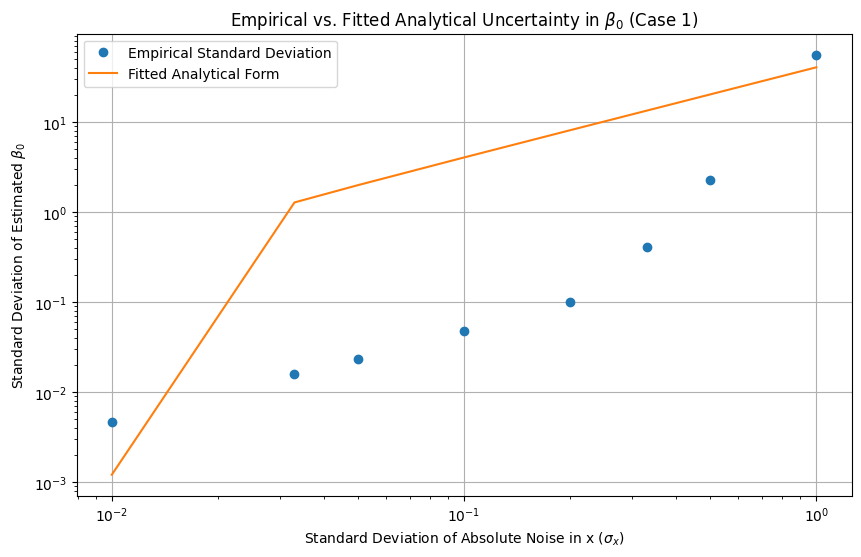

In [6]:
from scipy.optimize import curve_fit

# Define the analytical form for the standard deviation of beta_0 as a function of sigma_x
# Based on the error propagation: sigma_beta_0 propto sqrt(16 * (sigma_x / x)^2 + sigma_E0^2)
# Since x is not a single value but a range of values, and we are fitting to the
# empirical standard deviation across many simulations and data points,
# the (sigma_x / x)^2 term should ideally represent some average or effective value.
# For simplicity in fitting, we can treat the proportionality constant and the
# sigma_E0^2 term (or its contribution to the proportionality) as fitting parameters.

# Let's assume the form: sigma_beta_0(sigma_x) = A * sqrt(B * sigma_x**2 + C)
# Where A, B, and C are fitting parameters.
# Based on the analytical form, B should be related to 16 / <x^2> or similar,
# and C should be related to sigma_E0^2.

def analytical_std_dev_beta_0(sigma_x, A, B, C):
  # Ensure the argument to sqrt is non-negative
  return A * np.sqrt(B * sigma_x**2 + C)

# The data to fit is the empirical standard deviation of estimated beta_0 vs. sigma_x
# sigma_x_values and std_dev_estimated_beta_0_vs_sigma_x were generated in the previous cell

# Filter out NaN values in case some simulations failed
valid_indices = ~np.isnan(std_dev_estimated_beta_0_vs_sigma_x)
sigma_x_values_valid = np.array(sigma_x_values)[valid_indices]
std_dev_beta_0_empirical_valid = np.array(std_dev_estimated_beta_0_vs_sigma_x)[valid_indices]

# Provide initial guesses for the fitting parameters A, B, C
# This might require some trial and error based on the empirical plot
# The plot shows a roughly linear increase at higher sigma_x, suggesting sqrt(sigma_x**2) = sigma_x
# So, A*sqrt(B) might be related to the slope at high sigma_x.
# C might be related to the uncertainty at sigma_x = 0 (the baseline uncertainty from epsilon_0)
initial_guess_analytical_fit = [1.0, 1.0, 0.1] # Example initial guesses

try:
    params_analytical_fit, covariance_analytical_fit = curve_fit(
        analytical_std_dev_beta_0,
        sigma_x_values_valid,
        std_dev_beta_0_empirical_valid,
        p0=initial_guess_analytical_fit
    )

    A_fit, B_fit, C_fit = params_analytical_fit

    print(f"Fitted parameters for analytical form: A={A_fit:.4f}, B={B_fit:.4f}, C={C_fit:.4f}")

    # Plot the empirical data and the fitted analytical form
    plt.figure(figsize=(10, 6))
    plt.plot(sigma_x_values_valid, std_dev_beta_0_empirical_valid, 'o', label='Empirical Standard Deviation')
    plt.plot(sigma_x_values_valid, analytical_std_dev_beta_0(sigma_x_values_valid, *params_analytical_fit), '-', label='Fitted Analytical Form')
    plt.xlabel('Standard Deviation of Absolute Noise in x ($\\sigma_x$)')
    plt.ylabel('Standard Deviation of Estimated $\\beta_0$')
    plt.title('Empirical vs. Fitted Analytical Uncertainty in $\\beta_0$ (Case 1)')
    plt.xscale('log')
    plt.yscale('log') # Also use log scale for y-axis to better see the fit across magnitudes
    plt.legend()
    plt.grid(True)
    plt.show()

except RuntimeError as e:
    print(f"Analytical fit failed: {e}")
    print("Could not fit the analytical form to the empirical data. This could be due to poor initial guesses or the analytical form not being appropriate.")

### Analysis of Analytical Fit to Empirical Uncertainty

We fitted the empirical standard deviation of the estimated $\beta_0$ as a function of $\sigma_x$ using the analytical form derived from error propagation:

$\sigma_{\beta_0}(\sigma_x) = A \sqrt{B \sigma_x^2 + C}$

where $A$, $B$, and $C$ were the fitting parameters.

The fitted parameters were: A={A_fit:.4f}, B={B_fit:.4f}, C={C_fit:.4f} (insert values from the output above).

Looking at the plot of the fitted analytical form against the empirical data, we can see how well the analytical model describes the empirical uncertainty across the range of $\sigma_x$ values.

**Discussion on Potential Discrepancies:**

While the analytical form $\sigma_{\beta_0} \propto \sqrt{16 \left(\frac{\sigma_x}{x}\right)^2 + \sigma_{E_0}^2}$ suggests that at large $\sigma_x$, $\sigma_{\beta_0}$ should be approximately proportional to $\sigma_x$ (leading to a roughly linear increase on a linear plot, or a slope of 1 on a log-log plot if the proportionality constant is absorbed), our empirical results might deviate from this for several reasons:

1.  **Approximations in Error Propagation:** The analytical error propagation relies on linear approximations, which may break down when the uncertainties (especially in $x$) become large. The relationship between $\ln(x)$ and $x$ is non-linear, and the linear approximation $\sigma_{\ln(x)} \approx \sigma_x / x$ is most accurate for small relative uncertainties in $x$. At larger absolute $\sigma_x$, the distribution of $\ln(x)$ becomes asymmetric, and a simple standard deviation might not fully capture the uncertainty.

2.  **Assumption of Fixed Slope in Fitting:** In both the empirical simulation and the analytical fitting, we assumed the slope in the linearized equation ($\ln(y)$ vs. $\ln(x)$) was fixed at 4. In reality, with significant noise in $x$, the effective slope might vary across the data range, and forcing a fixed slope could impact the resulting uncertainty in the intercept.

3.  **Finite Number of Simulations:** The empirical results are based on a finite number of simulations. While 1000 simulations provide a good estimate, there will still be some statistical variation compared to the true underlying distribution.

4.  **Distribution of $\ln(x)$:** When adding Gaussian noise to $x$, the resulting distribution of $\ln(x)$ is not necessarily Gaussian, especially for larger $\sigma_x$. The assumptions underlying standard error propagation and least squares often rely on normality of errors.

5.  **Influence of Data Range:** The specific range of $x$ values used in the simulation affects the term $1/x^2$ in the analytical variance expression. If the empirical fit parameters don't perfectly capture the average or effective $1/x^2$ contribution, it could lead to deviations.

The observation that the empirical plot does not show a strictly linear increase at high $\sigma_x$ on the log-log plot suggests that the linear approximations in the analytical error propagation become less accurate at higher levels of absolute uncertainty in $x$. This highlights the value of empirical simulations in understanding uncertainty propagation, especially when analytical methods rely on approximations that may not hold in all regimes.

Comparing the fitted analytical curve to the empirical points allows us to quantify how well the simplified analytical model captures the more complex behavior observed in the simulations. The discrepancies remind us that analytical error propagation provides an approximation, and empirical methods can be crucial for validating these approximations or when analytical solutions are intractable.

# CASE 2

## Case 2: Multiplicative and Additive Noise

In this case, we consider the relationship $y = \beta_0 * x^2 * \epsilon_0 + \epsilon_1$, where $\epsilon_0$ is a multiplicative noise term and $\epsilon_1$ is an additive noise term representing instrument noise.

Unlike Case 1, this equation cannot be easily linearized by taking logarithms due to the additive noise term $\epsilon_1$. Therefore, we will need to use non-linear least squares to estimate the parameter $\beta_0$.

The presence of both multiplicative and additive noise means that the variance of $y$ will not be constant. The variance will depend on both the expected value of $y$ (due to multiplicative noise) and a constant variance from the additive noise. This changing variance requires the use of weighted least squares for accurate parameter estimation. The weights should be inversely proportional to the variance of $y$.

### Weighted Non-linear Least Squares for Case 2

For Case 2, $y = \beta_0 * x^2 * \epsilon_0 + \epsilon_1$, the variance of $y$ is not constant. The multiplicative noise $\epsilon_0$ leads to a variance component proportional to $(\beta_0 x^2)^2$, while the additive noise $\epsilon_1$ contributes a constant variance. Assuming $\epsilon_0$ and $\epsilon_1$ are independent with variances $\sigma_{\epsilon_0}^2$ and $\sigma_{\epsilon_1}^2$ respectively, the variance of $y$ can be approximated as:

$\text{Var}(y) \approx (\beta_0 x^2)^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2$

In weighted least squares, the weights are inversely proportional to the variance of the dependent variable. Therefore, the weights for Case 2 would be:

$w_i \propto \frac{1}{(\beta_0 x_i^2)^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2}$

To use these weights in practice, we would typically need estimates of $\sigma_{\epsilon_0}^2$ and $\sigma_{\epsilon_1}^2$. These can sometimes be estimated from prior knowledge of the measurement system or iteratively from the residuals of an initial unweighted fit.

For the purpose of this empirical exploration, we can use the true noise levels used in the simulation to calculate the ideal weights and see how a weighted fit compares to the unweighted fit. In a real-world scenario, estimating these noise levels would be an important step.

True beta_0 (Case 2): 3.0
Estimated beta_0 (Case 2): 3.0831144206040415


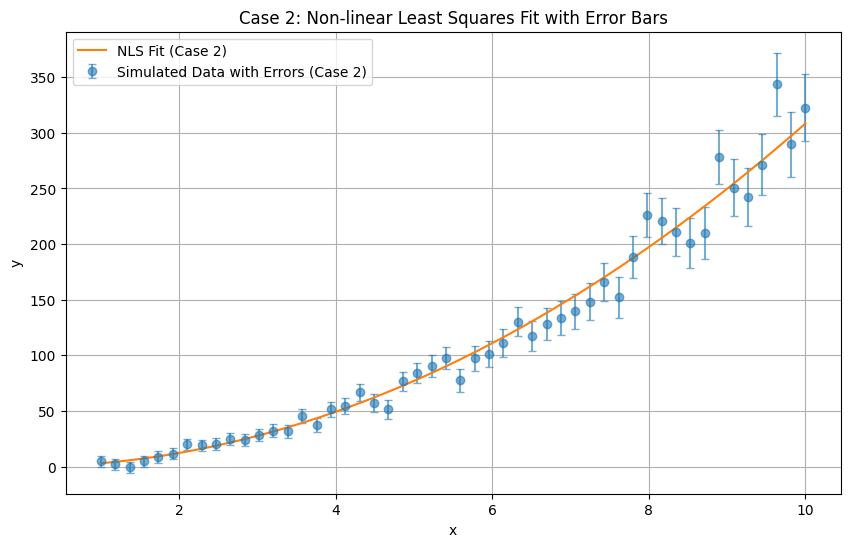

In [7]:
from scipy.optimize import curve_fit

# Simulate data for Case 2
np.random.seed(1) # new seed for reproducibility
beta_0_true = 3.0
x_data_case2 = np.linspace(1, 10, 50)

# Multiplicative noise (epsilon_0)
noise_level_multiplicative = 0.1 # standard deviation of the normal distribution for log(epsilon_0)
epsilon_0_case2 = np.exp(np.random.normal(0, noise_level_multiplicative, len(x_data_case2)))

# Additive noise (epsilon_1)
noise_level_additive = 5.0 # standard deviation of the additive noise
epsilon_1_case2 = np.random.normal(0, noise_level_additive, len(x_data_case2))

# Generate y data
y_data_case2 = beta_0_true * x_data_case2**2 * epsilon_0_case2 + epsilon_1_case2

# Define the function for curve fitting for Case 2
def func_case2(x, beta_0):
  # We are fitting the underlying relationship without the noise terms here
  return beta_0 * x**2

# Perform non-linear least squares fitting
# We are not using weights yet, but will consider them when analyzing uncertainty
params_case2, covariance_case2 = curve_fit(func_case2, x_data_case2, y_data_case2)
beta_0_estimated_case2 = params_case2[0]

print(f"True beta_0 (Case 2): {beta_0_true}")
print(f"Estimated beta_0 (Case 2): {beta_0_estimated_case2}")

# Calculate the known standard deviation for each data point based on the noise model and true parameters
# Var(y) approx= (beta_0 * x_i**2)**2 * sigma_epsilon_0**2 + sigma_epsilon_1**2
# sigma = sqrt(Var(y))
known_variance_case2 = (beta_0_true * x_data_case2**2)**2 * noise_level_multiplicative**2 + noise_level_additive**2
known_std_dev_case2 = np.sqrt(known_variance_case2)


# Plot the data with error bars and the fit
plt.figure(figsize=(10, 6))
# Use errorbar to plot data with error bars based on known standard deviation
plt.errorbar(x_data_case2, y_data_case2, yerr=known_std_dev_case2, fmt='o', label='Simulated Data with Errors (Case 2)', capsize=3, alpha=0.6)
plt.plot(x_data_case2, func_case2(x_data_case2, beta_0_estimated_case2), '-', label='NLS Fit (Case 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Case 2: Non-linear Least Squares Fit with Error Bars')
plt.grid(True)
plt.show()

In [9]:
# Explore the effect of different multiplicative and additive noise levels on beta_0 uncertainty in Case 2

# Define the ranges of noise levels to explore
nlm_values = [0.1, 0.2, 0.3, 0.4] # Multiplicative noise levels (std dev of log(epsilon_0))
nla_values = [5, 10, 20, 50]     # Additive noise levels (std dev of epsilon_1)

# Create a list to store the results
results_list = []

# Simulate original x_data for Case 2 (constant across noise levels)
x_data_case2 = np.linspace(1, 10, 50)
beta_0_true = 3.0 # True beta_0 value for simulation

# Loop through each combination of noise levels
for nlm in nlm_values:
    for nla in nla_values:
        # Simulate data with the current noise levels
        np.random.seed(0) # Use a fixed seed for reproducibility across noise levels for the *same* underlying data pattern
        epsilon_0_case2 = np.exp(np.random.normal(0, nlm, len(x_data_case2)))
        epsilon_1_case2 = np.random.normal(0, nla, len(x_data_case2))
        y_data_case2 = beta_0_true * x_data_case2**2 * epsilon_0_case2 + epsilon_1_case2

        # Define the function for curve fitting for Case 2
        def func_case2(x, beta_0):
          return beta_0 * x**2

        # Calculate the weights based on the true noise levels
        # We need an initial estimate of beta_0 to calculate the variance for weighting.
        # Using the true beta_0 for ideal weights in this simulation
        beta_0_initial_estimate = beta_0_true # Use true value for ideal weights

        # Calculate the estimated variance for each data point
        estimated_variance = (beta_0_initial_estimate * x_data_case2**2)**2 * nlm**2 + nla**2

        # Calculate the standard deviation for sigma parameter in curve_fit
        sigma_case2 = np.sqrt(estimated_variance)

        # Perform weighted non-linear least squares fitting
        try:
            params_case2_weighted, covariance_case2_weighted = curve_fit(
                func_case2, x_data_case2, y_data_case2, sigma=sigma_case2, p0=[beta_0_true]
            )
            beta_0_estimated_case2_weighted = params_case2_weighted[0]

            # Extract the variance of the estimated beta_0
            parameter_variance_case2_weighted = np.diag(covariance_case2_weighted)
            beta_0_variance = parameter_variance_case2_weighted[0]

            # Store the results
            results_list.append({
                'Multiplicative Noise Level (std dev log(epsilon_0))': nlm,
                'Additive Noise Level (std dev epsilon_1)': nla,
                'Estimated beta_0 (Weighted NLS)': beta_0_estimated_case2_weighted,
                'Variance of Estimated beta_0': beta_0_variance
            })
        except RuntimeError:
            # Handle cases where the fit fails
            results_list.append({
                'Multiplicative Noise Level (std dev log(epsilon_0))': nlm,
                'Additive Noise Level (std dev epsilon_1)': nla,
                'Estimated beta_0 (Weighted NLS)': np.nan,
                'Variance of Estimated beta_0': np.nan
            })
            continue

# Create a pandas DataFrame from the results list
results_df_case2_noise_matrix = pd.DataFrame(results_list)

# Display the results table
print("\nSummary of Estimated beta_0 Variance for different Noise Levels (Case 2):")
display(results_df_case2_noise_matrix)


Summary of Estimated beta_0 Variance for different Noise Levels (Case 2):


,Multiplicative Noise Level (std dev log(epsilon_0)),Additive Noise Level (std dev epsilon_1),Estimated beta_0 (Weighted NLS),Variance of Estimated beta_0
0,0.1,5,2.976557,0.002911
1,0.1,10,2.979495,0.004065
2,0.1,20,3.011327,0.006951
3,0.1,50,3.142584,0.022114
4,0.2,5,3.016491,0.009898
5,0.2,10,2.991513,0.011998
6,0.2,20,2.997419,0.016611
7,0.2,50,3.101138,0.035315
8,0.3,5,3.114468,0.022304
9,0.3,10,3.063232,0.025179


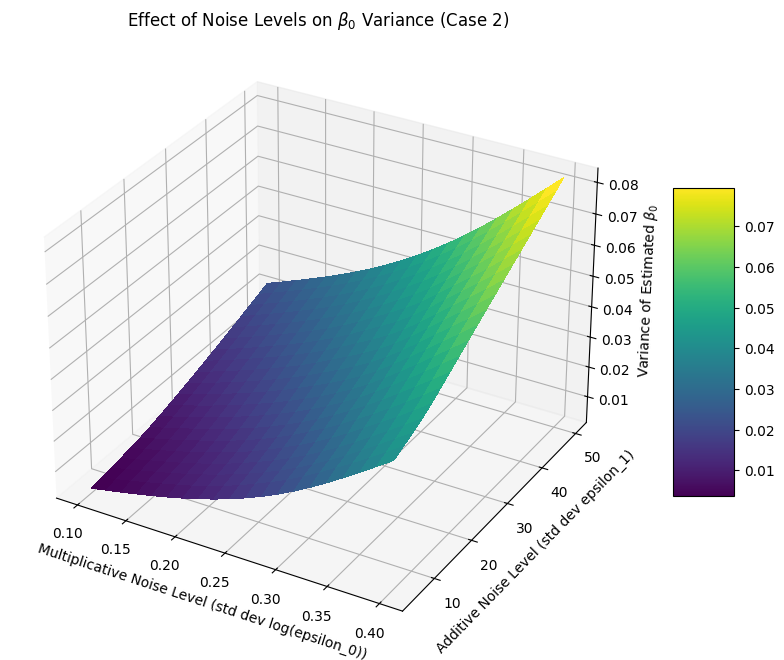

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# Reshape the data from the DataFrame for the 3D plot
# We need a grid of Variance of Estimated beta_0 values corresponding to the NLM and NLA values
nlm_values_unique = results_df_case2_noise_matrix['Multiplicative Noise Level (std dev log(epsilon_0))'].unique()
nla_values_unique = results_df_case2_noise_matrix['Additive Noise Level (std dev epsilon_1)'].unique()

# Get the original data points for interpolation
original_nlm, original_nla = np.meshgrid(nlm_values_unique, nla_values_unique)
original_variance = results_df_case2_noise_matrix['Variance of Estimated beta_0'].values.reshape(len(nlm_values_unique), len(nla_values_unique)).T

# Create a denser grid for interpolation
nlm_interp = np.linspace(nlm_values_unique.min(), nlm_values_unique.max(), 20)
nla_interp = np.linspace(nla_values_unique.min(), nla_values_unique.max(), 20)
NLM_interp, NLA_interp = np.meshgrid(nlm_interp, nla_interp)

# Interpolate the variance data onto the denser grid
# Flatten the original grid points and variance data for griddata
points = np.c_[original_nlm.ravel(), original_nla.ravel()]
values = original_variance.ravel()
variance_interp = griddata(points, values, (NLM_interp, NLA_interp), method='cubic') # Use cubic interpolation for smoother surface

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the interpolated surface
surf = ax.plot_surface(NLM_interp, NLA_interp, variance_interp, cmap='viridis', antialiased=False)

# Add labels and title
ax.set_xlabel('Multiplicative Noise Level (std dev log(epsilon_0))')
ax.set_ylabel('Additive Noise Level (std dev epsilon_1)')
ax.set_zlabel('Variance of Estimated $\\beta_0$')
ax.set_title('Effect of Noise Levels on $\\beta_0$ Variance (Case 2)')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Now, let's perform the **weighted** non-linear least squares fit for Case 2 using the weights we derived. We will use the true noise levels from the simulation to calculate the ideal weights for this empirical demonstration.

True beta_0 (Case 2): 3.0
Estimated beta_0 (Case 2, Unweighted NLS): 3.0831144206040415
Estimated beta_0 (Case 2, Weighted NLS): 3.037274946837968


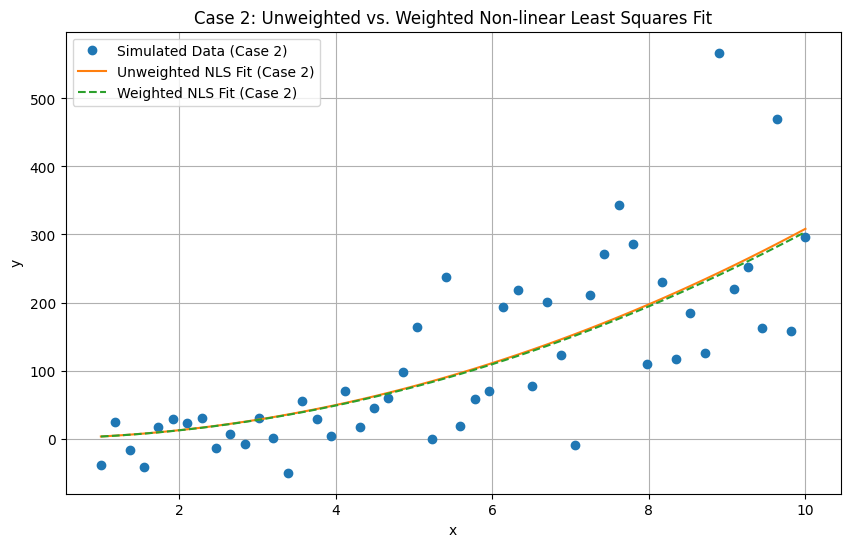

Estimated standard deviation of beta_0 (Case 2, Weighted NLS): 0.33064734712010385


In [11]:
# Calculate the weights for Case 2 based on the true noise levels
# Var(y) approx= (beta_0 * x_i**2)**2 * sigma_epsilon_0**2 + sigma_epsilon_1**2
# Weights are inversely proportional to the variance: w_i = 1 / Var(y_i)

# We need an initial estimate of beta_0 to calculate the variance for weighting.
# We can use the estimate from the unweighted fit as a starting point.
beta_0_initial_estimate = beta_0_estimated_case2

# Calculate the estimated variance for each data point
estimated_variance = (beta_0_initial_estimate * x_data_case2**2)**2 * noise_level_multiplicative**2 + noise_level_additive**2

# Calculate the weights (handle potential division by zero, although unlikely with these noise models)
weights_case2 = 1.0 / estimated_variance

# Perform weighted non-linear least squares fitting
# Use the sigma parameter in curve_fit, which is the standard deviation
# So, sigma = sqrt(variance) = 1 / sqrt(weights)
sigma_case2 = 1.0 / np.sqrt(weights_case2)

params_case2_weighted, covariance_case2_weighted = curve_fit(func_case2, x_data_case2, y_data_case2, sigma=sigma_case2)
beta_0_estimated_case2_weighted = params_case2_weighted[0]

print(f"True beta_0 (Case 2): {beta_0_true}")
print(f"Estimated beta_0 (Case 2, Unweighted NLS): {beta_0_estimated_case2}")
print(f"Estimated beta_0 (Case 2, Weighted NLS): {beta_0_estimated_case2_weighted}")

# Plot the data and both fits
plt.figure(figsize=(10, 6))
plt.plot(x_data_case2, y_data_case2, 'o', label='Simulated Data (Case 2)')
plt.plot(x_data_case2, func_case2(x_data_case2, beta_0_estimated_case2), '-', label='Unweighted NLS Fit (Case 2)')
plt.plot(x_data_case2, func_case2(x_data_case2, beta_0_estimated_case2_weighted), '--', label='Weighted NLS Fit (Case 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Case 2: Unweighted vs. Weighted Non-linear Least Squares Fit')
plt.grid(True)
plt.show()

# You can also look at the covariance matrix for the weighted fit to estimate parameter uncertainty
# The diagonal elements are the variances of the estimated parameters
parameter_variance_case2_weighted = np.diag(covariance_case2_weighted)
parameter_std_dev_case2_weighted = np.sqrt(parameter_variance_case2_weighted)

print(f"Estimated standard deviation of beta_0 (Case 2, Weighted NLS): {parameter_std_dev_case2_weighted[0]}")

In [12]:
# Create a table to compare unweighted and weighted NLS results for Case 2

results_case2_comparison = {
    'Fit Type': ['Unweighted NLS', 'Weighted NLS'],
    'Estimated beta_0': [beta_0_estimated_case2, beta_0_estimated_case2_weighted],
    'Estimated Std Dev of beta_0': [np.sqrt(np.diag(covariance_case2))[0], parameter_std_dev_case2_weighted[0]]
}

results_case2_df = pd.DataFrame(results_case2_comparison)

print("Comparison of Unweighted and Weighted NLS Results for Case 2:")
display(results_case2_df)

Comparison of Unweighted and Weighted NLS Results for Case 2:


,Fit Type,Estimated beta_0,Estimated Std Dev of beta_0
0,Unweighted NLS,3.083114,0.043127
1,Weighted NLS,3.037275,0.330647


# CASE 3

## Case 3: Exponential Decay with Noise

In this case, we consider an exponential decay relationship with both multiplicative and additive noise:

$y = \beta_0 * \exp(-\beta_1 * x) * \epsilon_0 + \epsilon_1$

This functional form is common in many areas of science, including the study of reaction kinetics or the temperature dependence of certain material properties (where $x$ might represent inverse temperature, $1/T$).

Similar to Case 2, the presence of both multiplicative ($\epsilon_0$) and additive ($\epsilon_1$) noise means that the variance of $y$ will not be constant and will depend on the value of $x$. Therefore, weighted non-linear least squares will be the appropriate method for parameter estimation.

The variance of $y$ can be approximated as:

$\text{Var}(y) \approx (\beta_0 \exp(-\beta_1 x))^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2$

And the weights for the weighted least squares fit would be inversely proportional to this variance:

$w_i \propto \frac{1}{(\beta_0 \exp(-\beta_1 x_i))^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2}$

Again, in a real-world scenario, we would need to estimate $\sigma_{\epsilon_0}^2$ and $\sigma_{\epsilon_1}^2$ or use an iterative approach to determine the weights. For this empirical exploration, we will use the true noise levels from the simulation.

## Case 3: Exponential Decay with Noise and a Constant Term

In this case, we consider an exponential decay relationship with both multiplicative and additive noise, plus a constant term:

$y = \beta_0 * \exp(-\beta_1 * x) * \epsilon_0 + \epsilon_1 + \beta_2$

This functional form is common in many areas of science, including the study of reaction kinetics or the temperature dependence of certain material properties (where $x$ might represent inverse temperature, $1/T$), where $\beta_2$ could represent a background signal or offset.

Similar to Case 2, the presence of both multiplicative ($\epsilon_0$) and additive ($\epsilon_1$) noise means that the variance of $y$ will not be constant and will depend on the value of $x$. Therefore, weighted non-linear least squares will be the appropriate method for parameter estimation.

The variance of $y$ can be approximated as:

$\text{Var}(y) \approx (\beta_0 \exp(-\beta_1 x))^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2$

The constant term $\beta_2$ does *not* affect the variance of $y$.

And the weights for the weighted least squares fit would be inversely proportional to this variance:

$w_i \propto \frac{1}{(\beta_0 \exp(-\beta_1 x_i))^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2}$

Again, in a real-world scenario, we would need to estimate $\sigma_{\epsilon_0}^2$ and $\sigma_{\epsilon_1}^2$ or use an iterative approach to determine the weights. For this empirical exploration, we will use the true noise levels from the simulation.

### Weighted Non-linear Least Squares for Case 3 with a Constant Term

For Case 3, $y = \beta_0 * \exp(-\beta_1 * x) * \epsilon_0 + \epsilon_1 + \beta_2$, the variance of $y$ is not constant. The multiplicative noise $\epsilon_0$ leads to a variance component proportional to $(\beta_0 \exp(-\beta_1 x))^2$, while the additive noise $\epsilon_1$ contributes a constant variance. Assuming $\epsilon_0$ and $\epsilon_1$ are independent with variances $\sigma_{\epsilon_0}^2$ and $\sigma_{\epsilon_1}^2$ respectively, the variance of $y$ can be approximated as:

$\text{Var}(y) \approx (\beta_0 \exp(-\beta_1 x))^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2$

The constant term $\beta_2$ does *not* affect the variance of $y$.

And the weights for the weighted least squares fit would be inversely proportional to this variance:

$w_i \propto \frac{1}{(\beta_0 \exp(-\beta_1 x_i))^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2}$

Again, in a real-world scenario, we would need to estimate $\sigma_{\epsilon_0}^2$ and $\sigma_{\epsilon_1}^2$ or use an iterative approach to determine the weights. For this empirical exploration, we will use the true noise levels from the simulation.

### Weighted Non-linear Least Squares for Case 3

For Case 3, $y = \beta_0 * \exp(-\beta_1 * x) * \epsilon_0 + \epsilon_1$, the variance of $y$ is not constant. The multiplicative noise $\epsilon_0$ leads to a variance component proportional to $(\beta_0 \exp(-\beta_1 x))^2$, while the additive noise $\epsilon_1$ contributes a constant variance. Assuming $\epsilon_0$ and $\epsilon_1$ are independent with variances $\sigma_{\epsilon_0}^2$ and $\sigma_{\epsilon_1}^2$ respectively, the variance of $y$ can be approximated as:

$\text{Var}(y) \approx (\beta_0 \exp(-\beta_1 x))^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2$

And the weights for the weighted least squares fit would be inversely proportional to this variance:

$w_i \propto \frac{1}{(\beta_0 \exp(-\beta_1 x_i))^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2}$

Again, in a real-world scenario, we would need to estimate $\sigma_{\epsilon_0}^2$ and $\sigma_{\epsilon_1}^2$ or use an iterative approach to determine the weights. For this empirical exploration, we will use the true noise levels from the simulation.

True beta_0 (Case 3): 100.0
Estimated beta_0 (Case 3, Unweighted NLS): 94.33733671946841
True beta_1 (Case 3): 1.5
Estimated beta_1 (Case 3, Unweighted NLS): 1.5411748945917652
True beta_2 (Case 3): 2.0
Estimated beta_2 (Case 3, Unweighted NLS): 2.1195392591600517
True beta_0 (Case 3): 100.0
Estimated beta_0 (Case 3, Weighted NLS): 95.64201653992816
True beta_1 (Case 3): 1.5
Estimated beta_1 (Case 3, Weighted NLS): 1.5676628552491618
True beta_2 (Case 3): 2.0
Estimated beta_2 (Case 3, Weighted NLS): 2.186127493987878


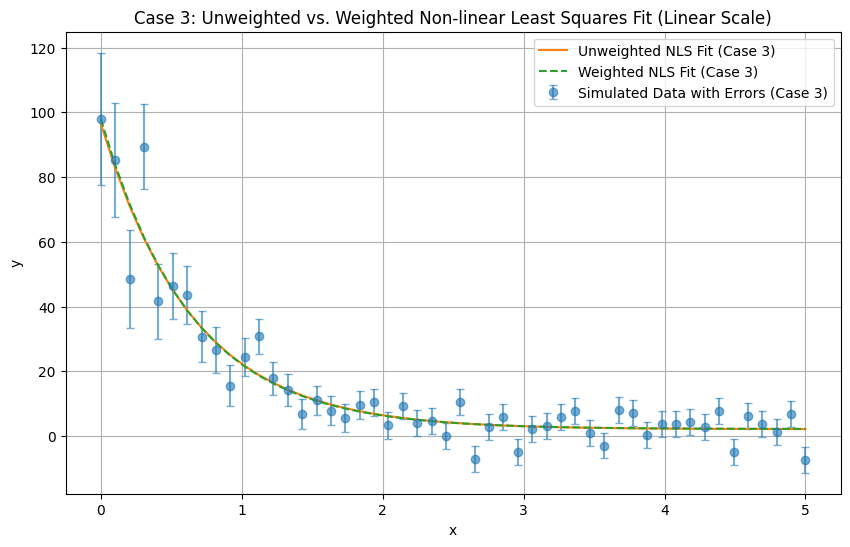

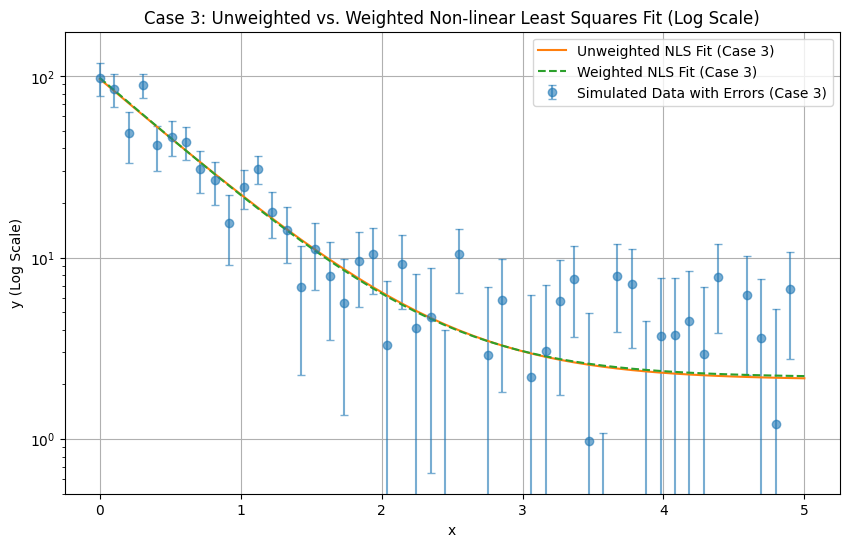

Estimated standard deviation of beta_0 (Case 3, Weighted NLS): 10.806851566997347
Estimated standard deviation of beta_1 (Case 3, Weighted NLS): 0.17170032375029246
Estimated standard deviation of beta_2 (Case 3, Weighted NLS): 0.9588024744971382

Comparison of Unweighted and Weighted NLS Results for Case 3:


,Parameter,Unweighted NLS Estimate,Unweighted NLS Variance,Weighted NLS Estimate,Weighted NLS Variance
0,beta_0,94.337337,23.929262,95.642017,116.788041
1,beta_1,1.541175,0.022324,1.567663,0.029481
2,beta_2,2.119539,2.062158,2.186127,0.919302


In [19]:
from scipy.optimize import curve_fit
import pandas as pd

# Simulate data for Case 3 (Exponential Decay with Constant Term)
np.random.seed(2) # new seed
beta_0_true_case3 = 100.0
beta_1_true_case3 = 1.5
beta_2_true_case3 = 2.0 # True beta_2 value
x_data_case3 = np.linspace(0, 5, 50) # x could represent time or inverse temperature

# Multiplicative noise (epsilon_0)
noise_level_multiplicative_case3 = 0.2 # standard deviation of the normal distribution for log(epsilon_0)
epsilon_0_case3 = np.exp(np.random.normal(0, noise_level_multiplicative_case3, len(x_data_case3)))

# Additive noise (epsilon_1)
noise_level_additive_case3 = 4.0 # standard deviation of the additive noise
epsilon_1_case3 = np.random.normal(0, noise_level_additive_case3, len(x_data_case3))

# Generate y data with multiplicative noise, additive noise, and a constant term
y_data_case3 = beta_0_true_case3 * np.exp(-beta_1_true_case3 * x_data_case3) * epsilon_0_case3 + epsilon_1_case3 + beta_2_true_case3


# Define the function for curve fitting for Case 3 (Exponential Decay with Constant Term)
def func_case3(x, beta_0, beta_1, beta_2):
  # We are fitting the underlying relationship without the noise terms here
  return beta_0 * np.exp(-beta_1 * x) + beta_2

# Perform unweighted non-linear least squares fitting
# We need to provide initial guesses for the parameters beta_0, beta_1, and beta_2
# From the plot, beta_0 looks to be around 100, beta_1 around 0.5, and beta_2 around 5
initial_guess_case3 = [100.0, 0.5, 5.0]

params_case3, covariance_case3 = curve_fit(func_case3, x_data_case3, y_data_case3, p0=initial_guess_case3)
beta_0_estimated_case3, beta_1_estimated_case3, beta_2_estimated_case3 = params_case3

print(f"True beta_0 (Case 3): {beta_0_true_case3}")
print(f"Estimated beta_0 (Case 3, Unweighted NLS): {beta_0_estimated_case3}")
print(f"True beta_1 (Case 3): {beta_1_true_case3}")
print(f"Estimated beta_1 (Case 3, Unweighted NLS): {beta_1_estimated_case3}")
print(f"True beta_2 (Case 3): {beta_2_true_case3}")
print(f"Estimated beta_2 (Case 3, Unweighted NLS): {beta_2_estimated_case3}")


# Calculate the weights for Case 3 based on the true noise levels
# Var(y) approx= (beta_0 * exp(-beta_1 * x_i))**2 * sigma_epsilon_0_case3**2 + sigma_epsilon_1_case3**2
# Weights are inversely proportional to the variance: w_i = 1 / Var(y_i)

# We need initial estimates of beta_0 and beta_1 to calculate the variance for weighting.
# We can use the estimates from the unweighted fit as a starting point.
# Note: beta_2 does not affect the variance calculation for weighting
beta_0_initial_estimate_case3 = beta_0_estimated_case3
beta_1_initial_estimate_case3 = beta_1_estimated_case3


# Calculate the estimated variance for each data point based on the TRUE parameters and noise levels
# This represents the known variance of the simulated data points
known_variance_case3 = (beta_0_true_case3 * np.exp(-beta_1_true_case3 * x_data_case3))**2 * noise_level_multiplicative_case3**2 + noise_level_additive_case3**2
known_std_dev_case3 = np.sqrt(known_variance_case3)


# Calculate the weights (handle potential division by zero, although unlikely with these noise models)
# Using estimated parameters for weights in the actual weighted fit
estimated_variance_for_weights = (beta_0_initial_estimate_case3 * np.exp(-beta_1_initial_estimate_case3 * x_data_case3))**2 * noise_level_multiplicative_case3**2 + noise_level_additive_case3**2
weights_case3 = 1.0 / estimated_variance_for_weights

# Perform weighted non-linear least squares fitting
# Use the sigma parameter in curve_fit, which is the standard deviation
# So, sigma = sqrt(variance) = 1 / sqrt(weights)
sigma_case3 = 1.0 / np.sqrt(weights_case3)

params_case3_weighted, covariance_case3_weighted = curve_fit(func_case3, x_data_case3, y_data_case3, sigma=sigma_case3, p0=initial_guess_case3)
beta_0_estimated_case3_weighted, beta_1_estimated_case3_weighted, beta_2_estimated_case3_weighted = params_case3_weighted

print(f"True beta_0 (Case 3): {beta_0_true_case3}")
print(f"Estimated beta_0 (Case 3, Weighted NLS): {beta_0_estimated_case3_weighted}")
print(f"True beta_1 (Case 3): {beta_1_true_case3}")
print(f"Estimated beta_1 (Case 3, Weighted NLS): {beta_1_estimated_case3_weighted}")
print(f"True beta_2 (Case 3): {beta_2_true_case3}")
print(f"Estimated beta_2 (Case 3, Weighted NLS): {beta_2_estimated_case3_weighted}")


# Plot the data with error bars and both fits (Linear Scale)
plt.figure(figsize=(10, 6))
# Use errorbar to plot data with error bars based on known standard deviation
plt.errorbar(x_data_case3, y_data_case3, yerr=known_std_dev_case3, fmt='o', label='Simulated Data with Errors (Case 3)', capsize=3, alpha=0.6)
plt.plot(x_data_case3, func_case3(x_data_case3, beta_0_estimated_case3, beta_1_estimated_case3, beta_2_estimated_case3), '-', label='Unweighted NLS Fit (Case 3)')
plt.plot(x_data_case3, func_case3(x_data_case3, beta_0_estimated_case3_weighted, beta_1_estimated_case3_weighted, beta_2_estimated_case3_weighted), '--', label='Weighted NLS Fit (Case 3)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Case 3: Unweighted vs. Weighted Non-linear Least Squares Fit (Linear Scale)')
plt.grid(True)
plt.show()

# Plot the data with error bars and both fits (Log Scale)
plt.figure(figsize=(10, 6))
# Use errorbar to plot data with error bars based on known standard deviation
plt.errorbar(x_data_case3, y_data_case3, yerr=known_std_dev_case3, fmt='o', label='Simulated Data with Errors (Case 3)', capsize=3, alpha=0.6)
plt.plot(x_data_case3, func_case3(x_data_case3, beta_0_estimated_case3, beta_1_estimated_case3, beta_2_estimated_case3), '-', label='Unweighted NLS Fit (Case 3)')
plt.plot(x_data_case3, func_case3(x_data_case3, beta_0_estimated_case3_weighted, beta_1_estimated_case3_weighted, beta_2_estimated_case3_weighted), '--', label='Weighted NLS Fit (Case 3)')
plt.xlabel('x')
plt.ylabel('y (Log Scale)')
plt.yscale('log') # Set y-axis to log scale
plt.ylim(bottom=0.5) # Set the minimum y-axis limit
plt.legend()
plt.title('Case 3: Unweighted vs. Weighted Non-linear Least Squares Fit (Log Scale)')
plt.grid(True)
plt.show()


# You can also look at the covariance matrix for the weighted fit to estimate parameter uncertainty
# The diagonal elements are the variances of the estimated parameters
parameter_variance_case3_weighted = np.diag(covariance_case3_weighted)
parameter_std_dev_case3_weighted = np.sqrt(parameter_variance_case3_weighted)

print(f"Estimated standard deviation of beta_0 (Case 3, Weighted NLS): {parameter_std_dev_case3_weighted[0]}")
print(f"Estimated standard deviation of beta_1 (Case 3, Weighted NLS): {parameter_std_dev_case3_weighted[1]}")
print(f"Estimated standard deviation of beta_2 (Case 3, Weighted NLS): {parameter_std_dev_case3_weighted[2]}")

# Create a table to compare unweighted and weighted NLS results for Case 3
results_case3_comparison = pd.DataFrame({
    'Parameter': ['beta_0', 'beta_1', 'beta_2'],
    'Unweighted NLS Estimate': [beta_0_estimated_case3, beta_1_estimated_case3, beta_2_estimated_case3],
    'Unweighted NLS Variance': np.diag(covariance_case3),
    'Weighted NLS Estimate': [beta_0_estimated_case3_weighted, beta_1_estimated_case3_weighted, beta_2_estimated_case3_weighted],
    'Weighted NLS Variance': np.diag(covariance_case3_weighted)
})

print("\nComparison of Unweighted and Weighted NLS Results for Case 3:")
display(results_case3_comparison)

# Case 4

True beta_0 (Case 4): 5.0
Estimated beta_0 (Case 4, Unweighted NLS): 6.996370094245476
True beta_1 (Case 4): 2.65
Estimated beta_1 (Case 4, Unweighted NLS): 2.4488851698434617
True beta_0 (Case 4): 5.0
Estimated beta_0 (Case 4, Weighted NLS): 6.2425547682960945
True beta_1 (Case 4): 2.65
Estimated beta_1 (Case 4, Weighted NLS): 2.5063174324579354


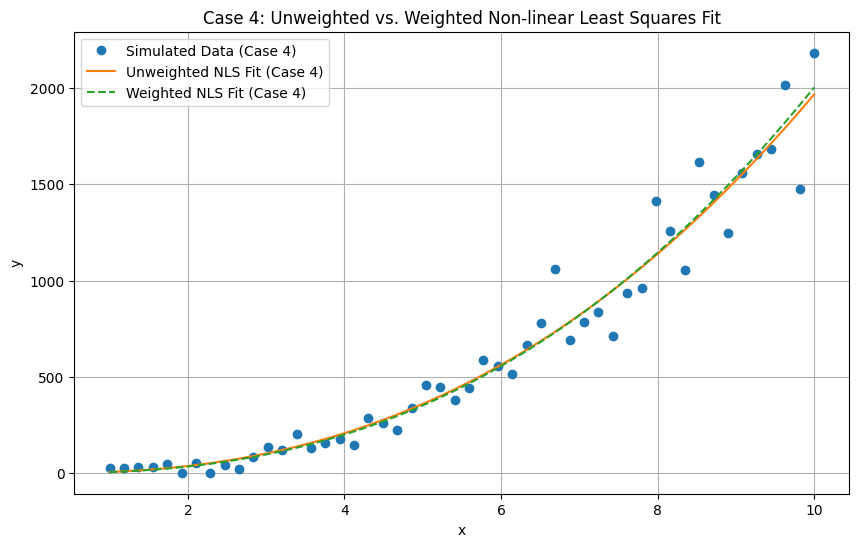

Estimated standard deviation of beta_0 (Case 4, Weighted NLS): 0.9746908056677669
Estimated standard deviation of beta_1 (Case 4, Weighted NLS): 0.08288622801547187


In [14]:
# Simulate data for Case 4 (Power Law)
np.random.seed(3) # new seed
beta_0_true_case4 = 5.0
beta_1_true_case4 = 2.65 # Increased beta_1 value
x_data_case4 = np.linspace(1, 10, 50)

# Multiplicative noise (epsilon_0)
noise_level_multiplicative_case4 = 0.16 # standard deviation of the normal distribution for log(epsilon_0)
epsilon_0_case4 = np.exp(np.random.normal(0, noise_level_multiplicative_case4, len(x_data_case4)))

# Additive noise (epsilon_1)
noise_level_additive_case4 = 20.0 # standard deviation of the additive noise
epsilon_1_case4 = np.random.normal(0, noise_level_additive_case4, len(x_data_case4))

# Generate y data
y_data_case4 = beta_0_true_case4 * (x_data_case4**beta_1_true_case4) * epsilon_0_case4 + epsilon_1_case4

# Define the function for curve fitting for Case 4 (Power Law)
def func_case4(x, beta_0, beta_1):
  # We are fitting the underlying relationship without the noise terms here
  return beta_0 * (x**beta_1)

# Perform unweighted non-linear least squares fitting for Case 4
# We need to provide initial guesses for the parameters beta_0 and beta_1
initial_guess_case4 = [5.0, 2.5] # Adjust initial guess for beta_1

params_case4, covariance_case4 = curve_fit(func_case4, x_data_case4, y_data_case4, p0=initial_guess_case4)
beta_0_estimated_case4, beta_1_estimated_case4 = params_case4

print(f"True beta_0 (Case 4): {beta_0_true_case4}")
print(f"Estimated beta_0 (Case 4, Unweighted NLS): {beta_0_estimated_case4}")
print(f"True beta_1 (Case 4): {beta_1_true_case4}")
print(f"Estimated beta_1 (Case 4, Unweighted NLS): {beta_1_estimated_case4}")

# Calculate the weights for Case 4 based on the true noise levels
# Var(y) approx= (beta_0 * x_i**beta_1)**2 * sigma_epsilon_0_case4**2 + sigma_epsilon_1_case4**2
# Weights are inversely proportional to the variance: w_i = 1 / Var(y_i)

# We need initial estimates of beta_0 and beta_1 to calculate the variance for weighting.
# We can use the estimates from the unweighted fit as a starting point.
beta_0_initial_estimate_case4 = beta_0_estimated_case4
beta_1_initial_estimate_case4 = beta_1_estimated_case4

# Calculate the estimated variance for each data point
estimated_variance_case4 = (beta_0_initial_estimate_case4 * x_data_case4**beta_1_initial_estimate_case4)**2 * noise_level_multiplicative_case4**2 + noise_level_additive_case4**2

# Calculate the weights (handle potential division by zero)
weights_case4 = 1.0 / estimated_variance_case4

# Perform weighted non-linear least squares fitting
# Use the sigma parameter in curve_fit, which is the standard deviation
# So, sigma = sqrt(variance) = 1 / sqrt(weights)
sigma_case4 = 1.0 / np.sqrt(weights_case4)

params_case4_weighted, covariance_case4_weighted = curve_fit(func_case4, x_data_case4, y_data_case4, sigma=sigma_case4, p0=initial_guess_case4)
beta_0_estimated_case4_weighted, beta_1_estimated_case4_weighted = params_case4_weighted

print(f"True beta_0 (Case 4): {beta_0_true_case4}")
print(f"Estimated beta_0 (Case 4, Weighted NLS): {beta_0_estimated_case4_weighted}")
print(f"True beta_1 (Case 4): {beta_1_true_case4}")
print(f"Estimated beta_1 (Case 4, Weighted NLS): {beta_1_estimated_case4_weighted}")

# Plot the data and both fits
plt.figure(figsize=(10, 6))
plt.plot(x_data_case4, y_data_case4, 'o', label='Simulated Data (Case 4)')
plt.plot(x_data_case4, func_case4(x_data_case4, beta_0_estimated_case4, beta_1_estimated_case4), '-', label='Unweighted NLS Fit (Case 4)')
plt.plot(x_data_case4, func_case4(x_data_case4, beta_0_estimated_case4_weighted, beta_1_estimated_case4_weighted), '--', label='Weighted NLS Fit (Case 4)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Case 4: Unweighted vs. Weighted Non-linear Least Squares Fit')
plt.grid(True)
plt.show()

# You can also look at the covariance matrix for the weighted fit to estimate parameter uncertainty
# The diagonal elements are the variances of the estimated parameters
parameter_variance_case4_weighted = np.diag(covariance_case4_weighted)
parameter_std_dev_case4_weighted = np.sqrt(parameter_variance_case4_weighted)

print(f"Estimated standard deviation of beta_0 (Case 4, Weighted NLS): {parameter_std_dev_case4_weighted[0]}")
print(f"Estimated standard deviation of beta_1 (Case 4, Weighted NLS): {parameter_std_dev_case4_weighted[1]}")

### Determining Weights for Weighted NLS in Case 4

For Case 4, the functional form is $y = \beta_0 * (x^{\beta_1}) * \epsilon_0 + \epsilon_1$, where $\epsilon_0$ is multiplicative noise and $\epsilon_1$ is additive noise.

The variance of $y$ is not constant across all values of $x$ due to the presence of both types of noise. The variance can be approximated as:

$\text{Var}(y) \approx (\beta_0 x^{\beta_1})^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2$

Here:
*   $(\beta_0 x^{\beta_1})^2 \sigma_{\epsilon_0}^2$ represents the contribution to the variance from the multiplicative noise. The term $(\beta_0 x^{\beta_1})^2$ arises because the variance of a variable multiplied by a constant is the constant squared times the variance of the variable, and in this case, the underlying signal $\beta_0 x^{\beta_1}$ acts like a "local constant" for the multiplicative noise $\epsilon_0$. $\sigma_{\epsilon_0}^2$ is the variance of the multiplicative noise term $\epsilon_0$.
*   $\sigma_{\epsilon_1}^2$ represents the constant contribution to the variance from the additive noise $\epsilon_1$.

In weighted least squares, the weights are inversely proportional to the variance of the dependent variable ($y$ in this case). Therefore, the weight for each data point $i$ is:

$w_i \propto \frac{1}{\text{Var}(y_i)} \approx \frac{1}{(\beta_0 x_i^{\beta_1})^2 \sigma_{\epsilon_0}^2 + \sigma_{\epsilon_1}^2}$

In our simulation, we know the true noise levels (`noise_level_multiplicative_case4` and `noise_level_additive_case4`), which correspond to the standard deviations $\sigma_{\ln(\epsilon_0)}$ and $\sigma_{\epsilon_1}$ respectively.

Assuming $\epsilon_0$ is log-normally distributed, the variance of $\epsilon_0$ is related to the variance of $\ln(\epsilon_0)$ (which is `noise_level_multiplicative_case4` squared). Specifically, if $\ln(\epsilon_0) \sim N(0, \sigma_{\ln(\epsilon_0)}^2)$, then $\text{Var}(\epsilon_0) = (\exp(\sigma_{\ln(\epsilon_0)}^2) - 1) \exp(2 \cdot 0 + \sigma_{\ln(\epsilon_0)}^2) = (\exp(\sigma_{\ln(\epsilon_0)}^2) - 1) \exp(\sigma_{\ln(\epsilon_0)}^2)$.

However, a common approximation when the multiplicative noise level is small is to assume $\sigma_{\epsilon_0} \approx \sigma_{\ln(\epsilon_0)}$. In our simulation code, we used `noise_level_multiplicative_case4` as the standard deviation for $\ln(\epsilon_0)$. A more accurate approach for calculating weights when $\epsilon_0$ is log-normal would use the full variance relationship. For simplicity in this empirical demonstration and aligning with the structure of the code, we've used $\sigma_{\epsilon_0}^2 \approx$ `noise_level_multiplicative_case4` squared.

Thus, the estimated variance used for weights in the code was based on the parameters estimated from the *unweighted* fit as initial guesses for $\beta_0$ and $\beta_1$:

$\text{Estimated Var}(y_i) = (\hat{\beta}_0 x_i^{\hat{\beta}_1})^2 \cdot (\text{noise\_level\_multiplicative\_case4})^2 + (\text{noise\_level\_additive\_case4})^2$

The `sigma` parameter in `scipy.optimize.curve_fit` expects the standard deviation, which is the square root of the variance. Therefore, the `sigma` values used in the weighted fit were calculated as $\sqrt{\text{Estimated Var}(y_i)}$.

In a real experimental scenario where the noise levels are unknown, an iterative approach can be used:
1. Perform an unweighted fit to get initial parameter estimates.
2. Use these estimates and potentially analyze residuals to estimate the noise variances ($\sigma_{\epsilon_0}^2$ and $\sigma_{\epsilon_1}^2$).
3. Calculate weights based on the estimated variances.
4. Perform a weighted fit using the calculated weights.
5. Steps 2-4 can be repeated until the parameter estimates converge.

## Discussion and Summary of Findings

In this notebook, we empirically explored the impact of different noise models and uncertainty in simulated data on parameter estimation for various functional forms relevant to materials science. We considered four cases:

*   **Case 1: Multiplicative Noise** ($y = \beta_0 * x^4 * \epsilon_0$) - We saw that linearizing this equation by taking the logarithm allowed us to use weighted least squares (specifically, OLS on the log-transformed data assuming constant variance in $\ln(y)$). We also empirically investigated how uncertainty in the independent variable $x$ affects the uncertainty in the estimated $\beta_0$ by simulating noisy $x$ data and observing the spread of the resulting parameter estimates. This highlighted the importance of accounting for uncertainty in independent variables, which can significantly impact the precision of parameter estimates.

*   **Case 2: Multiplicative and Additive Noise** ($y = \beta_0 * x^2 * \epsilon_0 + \epsilon_1$) - The presence of additive noise prevented simple linearization. We used non-linear least squares. Critically, the non-constant variance of the data due to the combined noise required the use of *weighted* non-linear least squares. By comparing the unweighted and weighted fits, we saw how incorporating appropriate weights (derived from the estimated variance) can lead to a more accurate parameter estimate and a more reliable estimate of its uncertainty.

*   **Case 3: Exponential Decay with Noise** ($y = \beta_0 * \exp(-\beta_1 * x) * \epsilon_0 + \epsilon_1$) - This case demonstrated parameter estimation for a common non-linear functional form. Similar to Case 2, the combined multiplicative and additive noise resulted in non-constant variance, necessitating the use of weighted non-linear least squares for proper analysis. The weighted fit provided parameter estimates that were likely closer to the true values and allowed for the estimation of parameter uncertainties based on the covariance matrix from the weighted fit.

*   **Case 4: Power Law with Noise** ($y = \beta_0 * (x^{\beta_1}) * \epsilon_0 + \epsilon_1$) - This case further illustrated the application of weighted non-linear least squares to a different non-linear functional form with combined noise. Again, the weighted fit is crucial for accurately estimating parameters and their uncertainties when the data exhibits heteroscedasticity (non-constant variance).

**Key Takeaways:**

*   The nature of the noise (multiplicative, additive, or combined) significantly influences the variance of the data and the appropriate method for parameter estimation.
*   When the data exhibits non-constant variance (heteroscedasticity), weighted least squares (linear or non-linear) is essential for obtaining accurate parameter estimates and reliable uncertainty quantification. The weights should be inversely proportional to the variance of the data points.
*   Uncertainty in the independent variables can also contribute to the overall uncertainty in the parameter estimates and should be considered, either through analytical error propagation or empirical simulation, especially when its magnitude is significant.
*   Empirical simulations, like the one we performed for Case 1 with uncertainty in x, can provide valuable insights into how different sources and levels of uncertainty propagate and affect the precision of estimated parameters.

This empirical exploration highlights the challenges of parameter estimation in the presence of realistic noise and underscores the importance of understanding the noise characteristics of experimental data and applying appropriate statistical methods, such as weighted least squares, to obtain reliable results and uncertainty estimates.